<a href="https://colab.research.google.com/github/Chloe0704/WeatherPrediction/blob/master/452_project_Chloe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Rain Tomorrow
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

###     #classification #stacking





How to find the best model is a hard question. So, instead of making the either-or decision, we can choose another option -- combing those model together to achieve a better performance, and this is called stacking.

------------------
By utilizing feature selection and stacking, this notebook uses weather data from Kaggle to explore how to predict whether tomorrow will rain based on today's weather information.

![GCP AutoML data](https://raw.githubusercontent.com/Chloe0704/Images/master/rain_pred.png)


#Data Ingest

###Mount Drive

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path = "/content/drive"
os.chdir(path)
os.listdir(path)
print(os.getcwd())

/content/drive


###Load Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [0]:
weather = pd.read_csv('My Drive/Colab Notebooks/452 HW/term_project/weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [0]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

###Drop columns that has higher than 50% NAs, and unrelated columns (date, location).

In [0]:
weather = weather.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
weather = weather.dropna(how='any')

#EDA

In [0]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,...,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,40.786611,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,...,0.058039,0.058570,0.066557,0.069285,0.071924,0.055444,0.061802,0.058517,0.053009,0.051813
std,6.254135,6.982702,8.602968,13.321774,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,...,0.233817,0.234819,0.249255,0.253939,0.258363,0.228846,0.240797,0.234719,0.224052,0.221651
min,-8.200000,2.600000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.200000,28.700000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


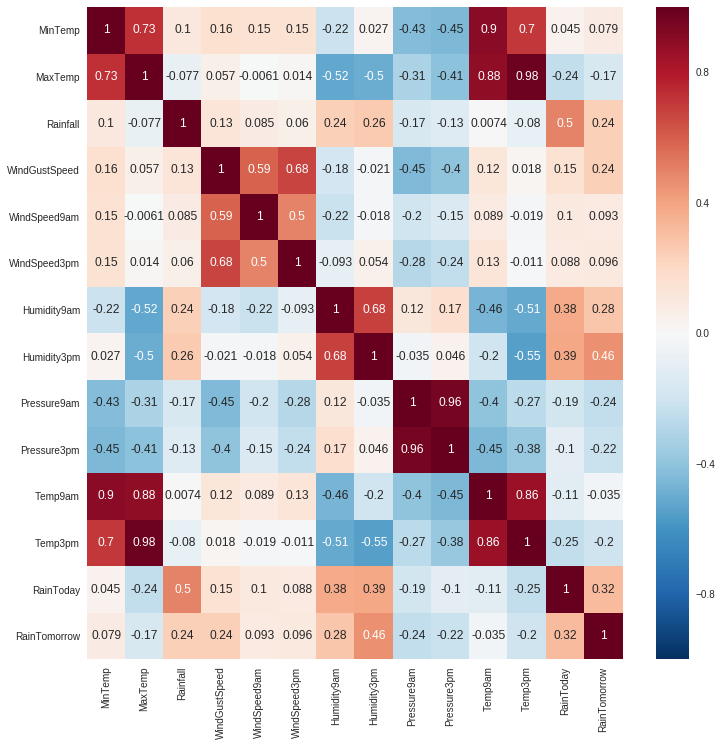

In [0]:
weather_part = weather[["MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm","RainToday","RainTomorrow"]]
plt.figure(figsize=(12,12))
sns.heatmap(weather_part.corr(),annot=True)

**RainTomorrow - Humidity**

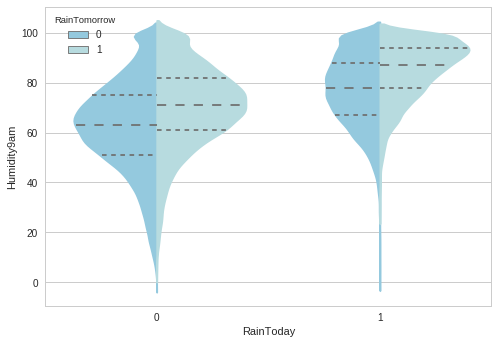

In [0]:
 ax = sns.violinplot(x="RainToday", y="Humidity9am", hue="RainTomorrow",
                     data=weather, palette={1: "powderblue", 0: "skyblue"}, split=True, inner="quartile")

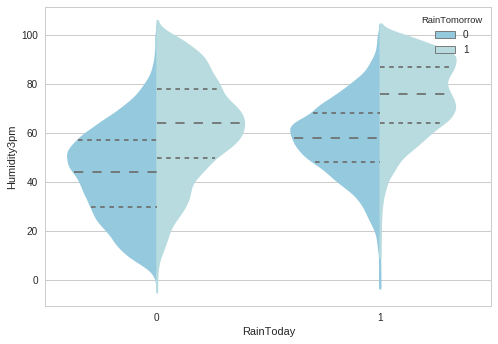

In [0]:
 ax = sns.violinplot(x="RainToday", y="Humidity3pm", hue="RainTomorrow",
                     data=weather, palette={1: "powderblue", 0: "skyblue"}, split=True, inner="quartile")

**RainTomorrow - WindGuestSpeed**

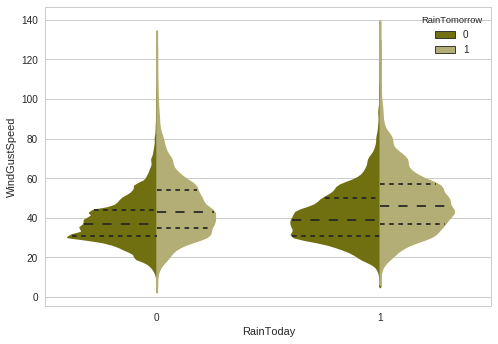

In [0]:
 ax = sns.violinplot(x="RainToday", y="WindGustSpeed", hue="RainTomorrow",
                     data=weather, palette={1: "darkkhaki", 0: "olive"}, split=True, inner="quartile")

**RainTomorrow - Pressure**

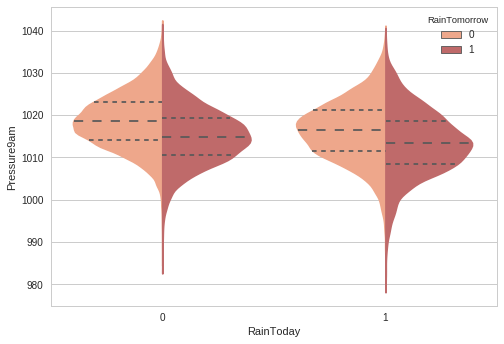

In [0]:
 ax = sns.violinplot(x="RainToday", y="Pressure9am", hue="RainTomorrow",
                     data=weather, palette={1: "indianred", 0: "lightsalmon"}, split=True, inner="quartile")

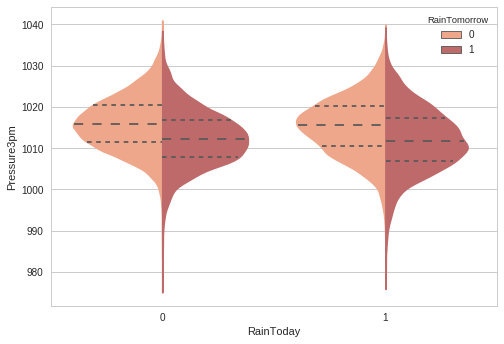

In [0]:
 ax = sns.violinplot(x="RainToday", y="Pressure3pm", hue="RainTomorrow",
                     data=weather, palette={1: "indianred", 0: "lightsalmon"}, split=True, inner="quartile")

**RainTomorrow - Temperature**

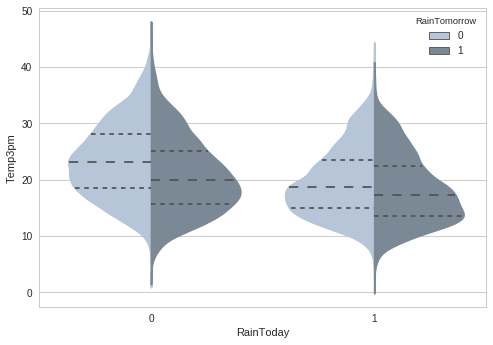

In [0]:
sns.set(style="whitegrid")
sns.violinplot(x="RainToday", y="Temp3pm", hue="RainTomorrow",
                     data=weather, palette={1: "lightslategrey", 0: "lightsteelblue"}, split=True, inner="quartile")

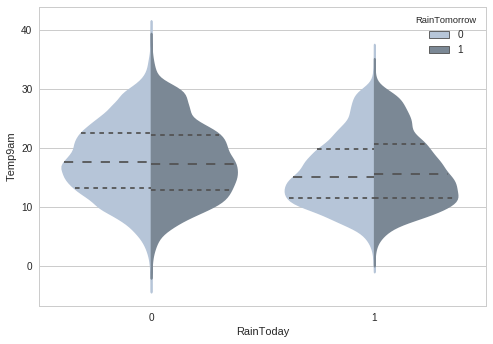

In [0]:
 ax = sns.violinplot(x="RainToday", y="Temp9am", hue="RainTomorrow",
                     data=weather, palette={1: "lightslategrey", 0: "lightsteelblue"}, split=True, inner="quartile")

#Modeling

####Transform categorical cloumns

In [0]:
weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [0]:
cat_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in cat_columns:
    print(np.unique(weather[col]))

weather = pd.get_dummies(weather, columns=cat_columns)
weather.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [0]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 63 columns):
MinTemp            112925 non-null float64
MaxTemp            112925 non-null float64
Rainfall           112925 non-null float64
WindGustSpeed      112925 non-null float64
WindSpeed9am       112925 non-null float64
WindSpeed3pm       112925 non-null float64
Humidity9am        112925 non-null float64
Humidity3pm        112925 non-null float64
Pressure9am        112925 non-null float64
Pressure3pm        112925 non-null float64
Temp9am            112925 non-null float64
Temp3pm            112925 non-null float64
RainToday          112925 non-null int64
RISK_MM            112925 non-null float64
RainTomorrow       112925 non-null int64
WindGustDir_E      112925 non-null uint8
WindGustDir_ENE    112925 non-null uint8
WindGustDir_ESE    112925 non-null uint8
WindGustDir_N      112925 non-null uint8
WindGustDir_NE     112925 non-null uint8
WindGustDir_NNE    112925 non-null uint8
Wi

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ConfusionMatrix
import warnings
warnings.filterwarnings("ignore")

####**Scale features**

In [0]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather)
weather = pd.DataFrame(scaler.transform(weather), index=weather.index, columns=weather.columns)

####**Select features**

In [0]:
X = weather.loc[:,weather.columns!='RainTomorrow']
y = weather[['RainTomorrow']]
selector = SelectKBest(chi2, k=5).fit(X, y)

In [0]:
diccionario = {key:value for (key, value) in zip(selector.scores_, X.columns)}
sorted(diccionario.items(),reverse=True)

[(8707.541786083593, 'RainToday'),
 (2333.683331675308, 'RISK_MM'),
 (1998.393946421575, 'Humidity3pm'),
 (543.3132314117555, 'Rainfall'),
 (458.7607212034137, 'Humidity9am'),
 (451.7182568045949, 'WindDir9am_N'),
 (311.7267162827702, 'WindDir9am_E'),
 (263.95520318319194, 'WindGustSpeed'),
 (256.9548667367807, 'WindDir9am_NNW'),
 (246.2740071528829, 'WindGustDir_E'),
 (237.89116910147436, 'Temp3pm'),
 (231.0401526937451, 'WindDir9am_ESE'),
 (218.05472980302704, 'WindDir9am_SE'),
 (181.96002403544648, 'WindDir3pm_NW'),
 (180.6211919412666, 'WindGustDir_WNW'),
 (164.10045996341324, 'WindDir3pm_WNW'),
 (163.89538647335988, 'MaxTemp'),
 (162.03006857341398, 'WindDir3pm_N'),
 (161.19669959291153, 'WindGustDir_ENE'),
 (156.05827850282725, 'WindGustDir_NW'),
 (148.47604159751967, 'Pressure9am'),
 (135.22850290745023, 'WindGustDir_NNW'),
 (133.92546074513302, 'WindDir3pm_NNW'),
 (124.88353329455876, 'WindGustDir_N'),
 (118.80582669250302, 'WindGustDir_W'),
 (115.7975156028517, 'Pressure3pm'),

In [0]:
feature = weather[["RainTomorrow","RainToday","RISK_MM","Humidity3pm","Rainfall","Humidity9am"]]

feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 6 columns):
RainTomorrow    112925 non-null float64
RainToday       112925 non-null float64
RISK_MM         112925 non-null float64
Humidity3pm     112925 non-null float64
Rainfall        112925 non-null float64
Humidity9am     112925 non-null float64
dtypes: float64(6)
memory usage: 11.0 MB


####**Split train & test data**

In [0]:
X = feature.loc[:,feature.columns!='RainTomorrow']
y = feature[['RainTomorrow']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90340 entries, 104982 to 85981
Data columns (total 5 columns):
RainToday      90340 non-null float64
RISK_MM        90340 non-null float64
Humidity3pm    90340 non-null float64
Rainfall       90340 non-null float64
Humidity9am    90340 non-null float64
dtypes: float64(5)
memory usage: 4.1 MB


###Modeling

####**Logistic Regression**

In [0]:
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8989152092096524


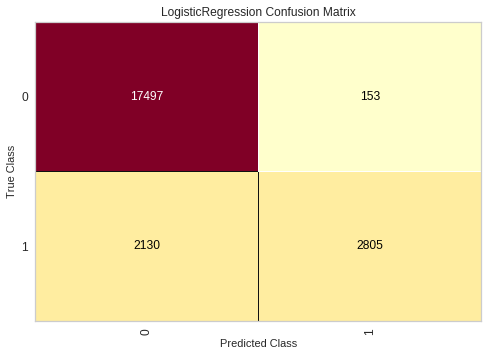

0.8989152092096524

In [0]:
cm = ConfusionMatrix(clf_logreg, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)
cm.poof()
clf_logreg.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (clf_logreg, metrics.classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     17650
         1.0       0.95      0.57      0.71      4935

   micro avg       0.90      0.90      0.90     22585
   macro avg       0.92      0.78      0.82     22585
weighted avg       0.90      0.90      0.89     22585




####**KNN**

In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train,y_train) 
y_pred = clf_knn.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.9297764002656631


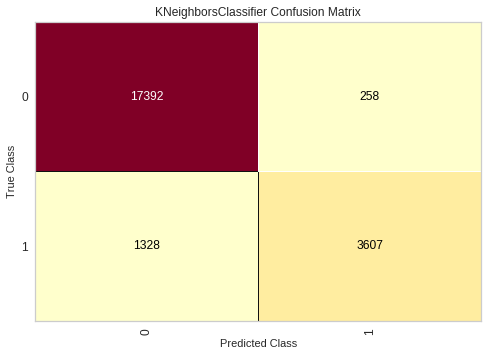

0.9297764002656631

In [0]:
cm = ConfusionMatrix(clf_knn, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)
cm.poof()
clf_knn.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (clf_knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     17650
         1.0       0.93      0.73      0.82      4935

   micro avg       0.93      0.93      0.93     22585
   macro avg       0.93      0.86      0.89     22585
weighted avg       0.93      0.93      0.93     22585




####**SDG**

In [0]:
from sklearn import linear_model
clf_SDG = linear_model.SGDClassifier(loss='log')
clf_SDG.fit(X=X_train,y=y_train)

y_pred = clf_SDG.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8600398494576046


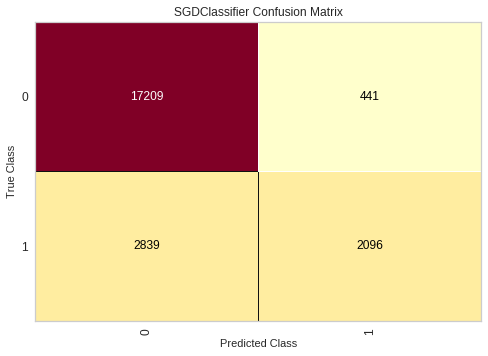

0.8547708656187735

In [0]:
cm = ConfusionMatrix(clf_SDG, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)
cm.poof()
clf_SDG.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (clf_SDG, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     17650
         1.0       0.79      0.49      0.60      4935

   micro avg       0.86      0.86      0.86     22585
   macro avg       0.83      0.73      0.76     22585
weighted avg       0.85      0.86      0.85     22585




###**Stacking**

![GCP AutoML data](https://raw.githubusercontent.com/Chloe0704/Images/master/stack.png)


http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble.

In [0]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [0]:
clf1 = clf_SDG #linear_model.SGDClassifier(loss='log')
clf2 = clf_knn  #KNeighborsClassifier(n_neighbors=5)
lr = clf_logreg  #LogisticRegression()  
sclf = StackingClassifier(classifiers=[clf1, clf2],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [0]:
sclf.fit(X_train,y_train) 
y_pred = sclf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.9317245959707771


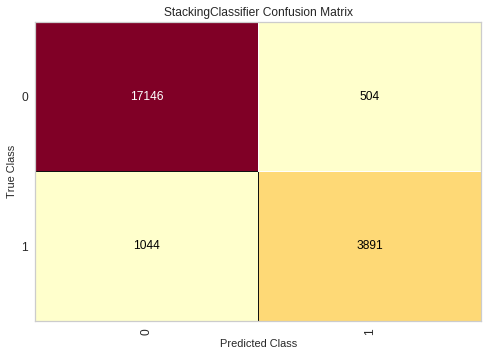

0.9314589329200798

In [0]:
cm = ConfusionMatrix(sclf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)
cm.poof()
sclf.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (sclf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier StackingClassifier(average_probas=False,
          classifiers=[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power...ski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0):
              precision    recall  f1-score   support

         0.0       0.94      

####Cross-validation (3-folds)

In [0]:
print('3-fold cross validation:\n')
 
for clf, label in zip([clf1, clf2, lr, sclf], 
                      ['KNN', 
                       'SDG', 
                       'Logistic Regression',
                       'StackingClassifier']):
 
    scores = model_selection.cross_val_score(clf, X_train,y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))


3-fold cross validation:

Accuracy: 0.85664 (+/- 0.0012) [KNN]
Accuracy: 0.91923 (+/- 0.0019) [SDG]
Accuracy: 0.89015 (+/- 0.0024) [Logistic Regression]
Accuracy: 0.92174 (+/- 0.0016) [StackingClassifier]


####**ROC AUC**

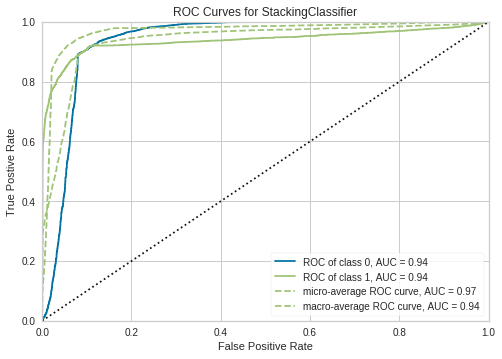

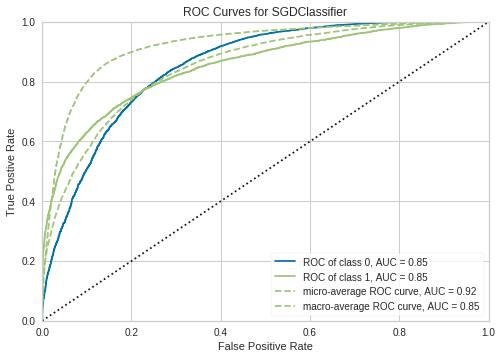

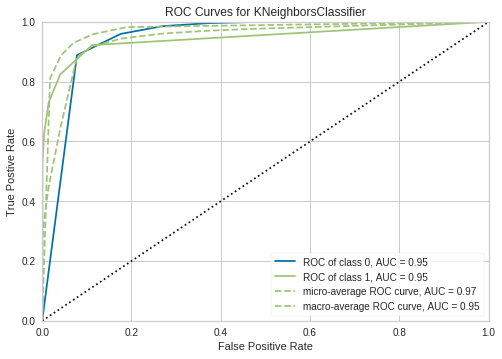

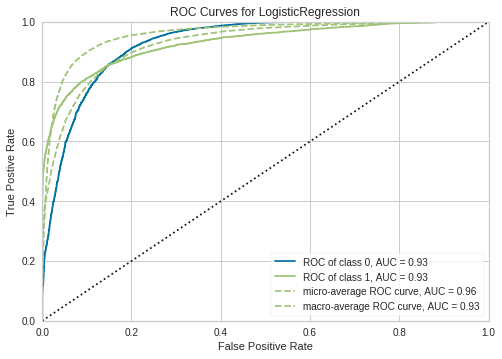

In [0]:
from yellowbrick.classifier import ROCAUC
classes=[0,1]


# Instantiate the visualizer with the STACKING regression model
visualizer = ROCAUC(sclf, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof() 



# Instantiate the visualizer with the SDG classification model
visualizer = ROCAUC(clf1, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()             

# Instantiate the visualizer with the KNN model
visualizer = ROCAUC(clf2, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof() 


# Instantiate the visualizer with the logistic regression model
visualizer = ROCAUC(lr, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof() 


#Conclusion

 * 	To predict whether tomorrow will rain, today’s humidity and rainfall(MM) is very important, higher humidity or higher rainfall today will lead to higher probability rain tomorrow.
 
 
 * 	Selecting the most relevant features helps to make the modeling process more efficient, and make it easier to understand the prediction results. But compared to dimension reduction, feature selection will lose some information due to dropping some features completely.
 
  
 *  Overall, stacking is combining different models in different tiers, and it indeed helps to increase the prediction accuracy; in addition, the different each model, the better the final model will be.
